In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Read CSV file into the pandas dataframe

df = pd.read_csv('thyroid.csv')
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,y
0,29,F,f,f,f,f,f,f,f,t,...,f,?,f,?,f,?,f,?,other,0
1,29,F,f,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,0
2,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,0
3,36,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,0
4,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,t,64,t,0.83,t,77,f,?,SVI,0
9168,22,M,f,f,f,f,f,f,f,f,...,t,91,t,0.92,t,99,f,?,SVI,0
9169,69,M,f,f,f,f,f,f,f,f,...,t,113,t,1.27,t,89,f,?,SVI,1
9170,47,F,f,f,f,f,f,f,f,f,...,t,75,t,0.85,t,88,f,?,other,0


In [3]:
#Shows the rows and columns of the dataframe
df.shape

(9172, 30)

In [4]:
#returns the value count in column 'y' percentage between 0 - 100 
round(df['y'].value_counts(normalize = True)*100,2)

0    73.82
1    26.18
Name: y, dtype: float64

In [5]:
# Sex column has 'Male' and 'Female' classification .  Calculating the percentage of females
round(df['sex'].value_counts(normalize = True)*100,2)

F    66.21
M    30.44
?     3.35
Name: sex, dtype: float64

In [6]:
#Statistica Analysis parameters
df.describe()

,age,y
count,9172.000000,9172.000000
mean,73.555822,0.261775
std,1183.976718,0.439625
min,1.000000,0.000000
25%,37.000000,0.000000
50%,55.000000,0.000000
75%,68.000000,1.000000
max,65526.000000,1.000000


In [7]:
#Averae age of all patients in the dataframe
round(df['age'].mean(),2)

73.56

In [8]:
# Number of unique values in the referral source column
len(df['referral source'].unique())

6

In [9]:
#highest frequency in the referral source column
df['referral source'].value_counts(ascending = False)

other    5493
SVI      2394
SVHC      956
STMW      255
SVHD       71
WEST        3
Name: referral source, dtype: int64

In [10]:
import numpy as np

pd.set_option('display.max_columns' ,30)

#Replace the dataset with sentinel values 
df.replace({"?" : np.nan},inplace = True)

In [11]:
#Now, replace all the sentinel values with np.nan. What percentage of all cells is marked with np.nan? Enter the answer as a value between 0 and 100, and two digits after the decimal point and without the percent sign.

total_na = df.isnull().sum().sum()
total_cell = df.size

round((total_na/total_cell)*100,2)

5.32

In [12]:
#What percentage of the rows in this data frame have at least one attribute flagged as a missing value. cEnter the answer as a value between 0 and 100, and two digits after the decimal point and without the percent sign.

#no of rows has the nan values

na_rows = (df.transpose().isnull().sum() != 0).sum()

total_rows = df.shape[0]

round((na_rows/total_rows)*100,2)

99.78

In [13]:
#What is the average number of missing values in all the data frame rows? Enter the answer as a number with two digits after the decimal point.

count_na_each_row = df.transpose().isnull().sum()

avg_mis_a_row = count_na_each_row.mean()

round(avg_mis_a_row,2)

1.59

In [14]:
#validation for fillna there are 307 NA values in Sex column. 
df_sex = df['sex'].fillna(value = df['sex'].mode()[0])

#expectation is to merge them with Female value as its the most repeated value in the column
df_sex.value_counts()

F    6380
M    2792
Name: sex, dtype: int64

In [15]:
#Replace all the missing values in the column sex with the value of the most frequent class. Then properly transform this column to a numerical column. What is the mean() of all the values in this column after the feature transformation? Enter the answer with two digits after the decimal point.

#Get the frequent class from 
freq_class_val = df['sex'].mode()[0]

print(f"The most frequent class of column sex is {freq_class_val}")


df['sex'].fillna(value = freq_class_val, inplace = True)
print('-'*30)
print("After Filling na's the column output")
print('-'*30)
print(df['sex'].value_counts())
print('-'*30)

print("Replacing the Female - 0 , male - 1 in the dataframe")
df['sex'].replace({"F" : 1,"M" : 0},inplace = True)
print('-'*30)
print(df['sex'].value_counts())
print('-'*30)

df['sex'] = df['sex'].astype(int)

print(f"Mean of values in the column : {round(df['sex'].mean(),2)}")

The most frequent class of column sex is F
------------------------------
After Filling na's the column output
------------------------------
F    6380
M    2792
Name: sex, dtype: int64
------------------------------
Replacing the Female - 0 , male - 1 in the dataframe
------------------------------
1    6380
0    2792
Name: sex, dtype: int64
------------------------------
Mean of values in the column : 0.7


In [16]:
df['on thyroxine'].value_counts(dropna = False)

f    7932
t    1240
Name: on thyroxine, dtype: int64

In [17]:
df['query on thyroxine'].value_counts(dropna = False)

f    9019
t     153
Name: query on thyroxine, dtype: int64

In [18]:
#How many instances in this data frame have different values on 'on thyroxine' and 'query on thyroxine'?
count = 0
for i in range(1,df.shape[0]):
  
    if(df.loc[i,'on thyroxine'] != df.loc[i,'query on thyroxine']):
        count+=1
print(count)

1345


In [19]:
#Thyroxine, also known as T4, is a type of thyroid hormone. This test measures the level of T4 in blood. Too much or too little T4 can indicate thyroid disease. Since we have other columns holding similar data, we will drop columns 'query on thyroxine',and 'on thyroxine' from the current data frame. After dropping these two columns, how many columns do you have in your data frame?
print(df.info())
no_of_columns_raw = df.shape[1]

df.drop(columns = ['query on thyroxine','on thyroxine'] , inplace = True)

no_of_columns_removed = 2

no_of_colummns_df = no_of_columns_raw - no_of_columns_removed

if(no_of_colummns_df == df.shape[1]):
    print("Two Columns removed from the data frame and the Dataframe has: ",df.shape[1])
else : 
    print("Execute complete file again")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        9172 non-null   int64 
 1   sex                        9172 non-null   int64 
 2   on thyroxine               9172 non-null   object
 3   query on thyroxine         9172 non-null   object
 4   on antithyroid medication  9172 non-null   object
 5   sick                       9172 non-null   object
 6   pregnant                   9172 non-null   object
 7   thyroid surgery            9172 non-null   object
 8   I131 treatment             9172 non-null   object
 9   query hypothyroid          9172 non-null   object
 10  query hyperthyroid         9172 non-null   object
 11  lithium                    9172 non-null   object
 12  goitre                     9172 non-null   object
 13  tumor                      9172 non-null   object
 14  hypopitu

In [20]:
#Apply a proper data transformation on the columns 'on antithyroid medication' and 'sick' to transform them into numerical columns. Then use a correlation function np.corrcoef to find the linear correlation coefficient of these two columns. You can read about this function here[https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html]. Enter the correlation coefficient with two digits after the decimal point.

anti_df = df['on antithyroid medication'].unique()  
sick_df = df['sick'].unique()  
print ( "Values in column : on antithyroid medicationm are ",anti_df)
print ( "Values in column : sick are ",sick_df)

df['on antithyroid medication'].replace({"f" : 1 , "t" : 0} , inplace = True)
df['sick'].replace({"f" : 1 , "t" : 0} , inplace = True)

xarr = df['on antithyroid medication']
yarr = df['sick']

my_cor = np.corrcoef(xarr,yarr)
print(my_cor)

Values in column : on antithyroid medicationm are  ['f' 't']
Values in column : sick are  ['f' 't']
[[ 1.         -0.02234132]
 [-0.02234132  1.        ]]


In [21]:
x = np.array([[0, 2], [1, 1], [2, 0]])
x.shape

(3, 2)

In [22]:
df['I131 treatment'].unique()

array(['f', 't'], dtype=object)

In [23]:
#What is a proper data transformation on the column 'I131 treatment'? Apply the transformation on your data frame.
df['I131 treatment'].value_counts(dropna = False)

f    9003
t     169
Name: I131 treatment, dtype: int64

In [24]:
df['I131 treatment'].replace({"f" : 1 , "t" : 0} , inplace = True)
df['I131 treatment'].value_counts(dropna = False)

1    9003
0     169
Name: I131 treatment, dtype: int64

In [25]:
#What is a proper data transformation on the column 'thyroid surgery'? Apply the transformation on your data frame.
df['thyroid surgery'].value_counts(dropna = False)

f    9038
t     134
Name: thyroid surgery, dtype: int64

In [26]:
df['thyroid surgery'].replace({"f" : 1 , "t" : 0} , inplace = True)
df['thyroid surgery'].value_counts(dropna = False)

1    9038
0     134
Name: thyroid surgery, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        9172 non-null   int64 
 1   sex                        9172 non-null   int64 
 2   on antithyroid medication  9172 non-null   int64 
 3   sick                       9172 non-null   int64 
 4   pregnant                   9172 non-null   object
 5   thyroid surgery            9172 non-null   int64 
 6   I131 treatment             9172 non-null   int64 
 7   query hypothyroid          9172 non-null   object
 8   query hyperthyroid         9172 non-null   object
 9   lithium                    9172 non-null   object
 10  goitre                     9172 non-null   object
 11  tumor                      9172 non-null   object
 12  hypopituitary              9172 non-null   object
 13  psych                      9172 non-null   object
 14  TSH meas

In [28]:
#What is a proper data transformation on the column 'pregnant'? Apply the transformation on your data frame.
df['pregnant'].value_counts()

f    9065
t     107
Name: pregnant, dtype: int64

In [29]:
df['pregnant'].replace({"f" : 1 , "t" : 0} , inplace = True)
df['pregnant'].value_counts()

1    9065
0     107
Name: pregnant, dtype: int64

In [30]:
#What is a proper data transformation on the column 'query hypothyroid'? Apply the transformation on your data frame.
df['query hypothyroid'].value_counts() 

f    8542
t     630
Name: query hypothyroid, dtype: int64

In [31]:
df['query hypothyroid'].replace({"f" : 1 , "t" : 0} , inplace = True)
df['query hypothyroid'].value_counts()

1    8542
0     630
Name: query hypothyroid, dtype: int64

In [32]:
#What is a proper data transformation on the column  'query hyperthyroid'? Apply the transformation on your data frame.
df['query hyperthyroid'].value_counts()

f    8521
t     651
Name: query hyperthyroid, dtype: int64

In [33]:
df['query hyperthyroid'].replace({"f" : 1 , "t" : 0} , inplace = True)
df['query hyperthyroid'].value_counts()

1    8521
0     651
Name: query hyperthyroid, dtype: int64

In [34]:
#What is a proper data transformation on the column  'lithium'? Apply the transformation on your data frame.
df['lithium'].value_counts()

f    9079
t      93
Name: lithium, dtype: int64

In [35]:
df['lithium'].replace({"f" : 1 , "t" : 0} , inplace = True)
df['lithium'].value_counts()

1    9079
0      93
Name: lithium, dtype: int64

In [36]:
#What is a proper data transformation on the column 'goitre'? Apply the transformation on your data frame.
df['goitre'].value_counts()

f    9088
t      84
Name: goitre, dtype: int64

In [37]:
df['goitre'].replace({"f" : 1 , "t" : 0} , inplace = True)
df['goitre'].value_counts()

1    9088
0      84
Name: goitre, dtype: int64

In [38]:
#What is a proper data transformation on the column  'tumor'? Apply the transformation on your data frame.
df['tumor'].value_counts()

f    8931
t     241
Name: tumor, dtype: int64

In [39]:
df['tumor'].replace({"f" : 1 , "t" : 0} , inplace = True)
df['tumor'].value_counts()

1    8931
0     241
Name: tumor, dtype: int64

In [40]:
#Column 'hypopituitary' has value 'f' except in two instances. In this case, dropping this column and lowering the dimensionality is the best choice.

df['hypopituitary'].value_counts()

f    9170
t       2
Name: hypopituitary, dtype: int64

In [127]:
df[df['hypopituitary'] == 't']

df.drop('hypopituitary',axis = 1,inplace = True)

In [42]:
# What is a proper data transformation on the column  'psych'? Apply the transformation on your data frame.
df['psych'].value_counts()

f    8754
t     418
Name: psych, dtype: int64

In [43]:
df['psych'].replace({"f" : 1 , "t" : 0} , inplace = True)
df['psych'].value_counts()

1    8754
0     418
Name: psych, dtype: int64

In [44]:
#What is a proper data transformation on the column  'TSH measured'? Apply the transformation on your data frame.
df['TSH measured'].value_counts()

t    8330
f     842
Name: TSH measured, dtype: int64

In [45]:
df['TSH measured'].replace({"t" : 1 , "f" : 0} , inplace = True)
df['TSH measured'].value_counts()

1    8330
0     842
Name: TSH measured, dtype: int64

In [46]:
#If you study the data frame carefully, you can see that instances with 'TSH measured' value as 'f', have NaN values under the column 'TSH.' To impute missing values in this column, we will replace all the NaN values with 0. What is the column 'TSH' average after this data transformation? Enter the answer with two digits after the decimal point
df['TSH'].value_counts(dropna = False)

NaN          842
0.1          303
1.3          246
1.1          234
1.4          233
            ... 
13.299999      1
67             1
117            1
14.299999      1
74             1
Name: TSH, Length: 370, dtype: int64

In [47]:
df['TSH'].fillna(value=0 , inplace = True)

In [48]:
df['TSH'].value_counts(dropna = False)

0            842
0.1          303
1.3          246
1.1          234
1.4          233
            ... 
13.299999      1
67             1
117            1
14.299999      1
74             1
Name: TSH, Length: 370, dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        9172 non-null   int64 
 1   sex                        9172 non-null   int64 
 2   on antithyroid medication  9172 non-null   int64 
 3   sick                       9172 non-null   int64 
 4   pregnant                   9172 non-null   int64 
 5   thyroid surgery            9172 non-null   int64 
 6   I131 treatment             9172 non-null   int64 
 7   query hypothyroid          9172 non-null   int64 
 8   query hyperthyroid         9172 non-null   int64 
 9   lithium                    9172 non-null   int64 
 10  goitre                     9172 non-null   int64 
 11  tumor                      9172 non-null   int64 
 12  hypopituitary              9172 non-null   object
 13  psych                      9172 non-null   int64 
 14  TSH meas

In [50]:
df['TSH'] = df['TSH'].astype(float)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        9172 non-null   int64  
 1   sex                        9172 non-null   int64  
 2   on antithyroid medication  9172 non-null   int64  
 3   sick                       9172 non-null   int64  
 4   pregnant                   9172 non-null   int64  
 5   thyroid surgery            9172 non-null   int64  
 6   I131 treatment             9172 non-null   int64  
 7   query hypothyroid          9172 non-null   int64  
 8   query hyperthyroid         9172 non-null   int64  
 9   lithium                    9172 non-null   int64  
 10  goitre                     9172 non-null   int64  
 11  tumor                      9172 non-null   int64  
 12  hypopituitary              9172 non-null   object 
 13  psych                      9172 non-null   int64

In [52]:
df['TSH'].mean()

4.739347463911888

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        9172 non-null   int64  
 1   sex                        9172 non-null   int64  
 2   on antithyroid medication  9172 non-null   int64  
 3   sick                       9172 non-null   int64  
 4   pregnant                   9172 non-null   int64  
 5   thyroid surgery            9172 non-null   int64  
 6   I131 treatment             9172 non-null   int64  
 7   query hypothyroid          9172 non-null   int64  
 8   query hyperthyroid         9172 non-null   int64  
 9   lithium                    9172 non-null   int64  
 10  goitre                     9172 non-null   int64  
 11  tumor                      9172 non-null   int64  
 12  hypopituitary              9172 non-null   object 
 13  psych                      9172 non-null   int64

In [54]:
df['TT4 measured'].value_counts(dropna = False)

t    8730
f     442
Name: TT4 measured, dtype: int64

In [55]:
df['TT4 measured'].replace({"t" : 1 , "f" : 0} ,inplace = True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        9172 non-null   int64  
 1   sex                        9172 non-null   int64  
 2   on antithyroid medication  9172 non-null   int64  
 3   sick                       9172 non-null   int64  
 4   pregnant                   9172 non-null   int64  
 5   thyroid surgery            9172 non-null   int64  
 6   I131 treatment             9172 non-null   int64  
 7   query hypothyroid          9172 non-null   int64  
 8   query hyperthyroid         9172 non-null   int64  
 9   lithium                    9172 non-null   int64  
 10  goitre                     9172 non-null   int64  
 11  tumor                      9172 non-null   int64  
 12  hypopituitary              9172 non-null   object 
 13  psych                      9172 non-null   int64

In [57]:
df["TT4"].value_counts(dropna = False)

NaN    442
101    157
98     147
93     146
91     135
      ... 
600      1
242      1
359      1
7.5      1
247      1
Name: TT4, Length: 288, dtype: int64

In [58]:
df["TT4"].fillna(value = 0,inplace = True )

In [59]:
df["TT4"].value_counts(dropna = False)

0      442
101    157
98     147
93     146
91     135
      ... 
600      1
242      1
359      1
7.5      1
247      1
Name: TT4, Length: 288, dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        9172 non-null   int64  
 1   sex                        9172 non-null   int64  
 2   on antithyroid medication  9172 non-null   int64  
 3   sick                       9172 non-null   int64  
 4   pregnant                   9172 non-null   int64  
 5   thyroid surgery            9172 non-null   int64  
 6   I131 treatment             9172 non-null   int64  
 7   query hypothyroid          9172 non-null   int64  
 8   query hyperthyroid         9172 non-null   int64  
 9   lithium                    9172 non-null   int64  
 10  goitre                     9172 non-null   int64  
 11  tumor                      9172 non-null   int64  
 12  hypopituitary              9172 non-null   object 
 13  psych                      9172 non-null   int64

In [61]:
df["TT4"] = df["TT4"].astype(float)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        9172 non-null   int64  
 1   sex                        9172 non-null   int64  
 2   on antithyroid medication  9172 non-null   int64  
 3   sick                       9172 non-null   int64  
 4   pregnant                   9172 non-null   int64  
 5   thyroid surgery            9172 non-null   int64  
 6   I131 treatment             9172 non-null   int64  
 7   query hypothyroid          9172 non-null   int64  
 8   query hyperthyroid         9172 non-null   int64  
 9   lithium                    9172 non-null   int64  
 10  goitre                     9172 non-null   int64  
 11  tumor                      9172 non-null   int64  
 12  hypopituitary              9172 non-null   object 
 13  psych                      9172 non-null   int64

In [63]:
round(df["TT4"].mean(),2)

103.46

In [64]:
#What is a proper data transformation on the column 'T3 measured'? Apply the transformation on your data frame.
df['T3 measured'].value_counts(dropna = False)

t    6568
f    2604
Name: T3 measured, dtype: int64

In [65]:
df['T3 measured'].replace({"t" : 1 , "f" : 0} ,inplace = True)

In [66]:
df['T3 measured'].value_counts(dropna = False)

1    6568
0    2604
Name: T3 measured, dtype: int64

In [67]:
#If you study the data frame carefully, you can see that instances with 'T3 measured' value as 'f', have NaN values under the column 'T3' To impute missing values in this column, we will replace all the NaN values with 0. What is the column 'T3' average after this data transformation? Enter the answer with two digits after the decimal point.
df['T3'].value_counts(dropna = False)

NaN         2604
1.8          452
2            452
1.9          408
2.1          396
            ... 
6.9            1
7.3            1
0.93           1
8.599999       1
1.44           1
Name: T3, Length: 86, dtype: int64

In [68]:
df['T3'].fillna(value = 0 , inplace = True)

In [69]:
df['T3'].value_counts(dropna = False)

0           2604
1.8          452
2            452
1.9          408
2.1          396
            ... 
6.9            1
7.3            1
0.93           1
8.599999       1
1.44           1
Name: T3, Length: 86, dtype: int64

In [70]:
df['T3'] = df['T3'].astype(float)

In [71]:
round(df['T3'].mean(),2)

1.41

In [72]:
#What is a proper data transformation on the column 'T4U measured'? Apply the transformation on your datarame.
df['T4U measured'].value_counts(dropna = False)

t    8363
f     809
Name: T4U measured, dtype: int64

In [73]:
df['T4U measured'].replace({"t" : 1 , "f" : 0} ,inplace = True)

In [74]:
df['T4U measured'].value_counts(dropna = False)

1    8363
0     809
Name: T4U measured, dtype: int64

In [75]:
#If you study the data frame carefully, you can see that instances with 'T4U measured' value as 'f', have NaN values under the column 'T3' To impute missing values in this column, we will replace all the NaN values with 0. What is the column 'T4U' average after this data transformation? Enter the answer with two digits after the decimal point.
df['T4U'].value_counts(dropna = False)

NaN      809
0.96     228
0.91     227
0.99     226
0.93     226
        ... 
0.944      1
1.87       1
0.3        1
2.12       1
2.32       1
Name: T4U, Length: 177, dtype: int64

In [76]:
df['T4U'].fillna(value = 0 , inplace = True)

In [77]:
df['T4U'].value_counts(dropna = False)

0        809
0.96     228
0.91     227
0.99     226
0.93     226
        ... 
0.944      1
1.87       1
0.3        1
2.12       1
2.32       1
Name: T4U, Length: 177, dtype: int64

In [78]:
df['T4U']=df['T4U'].astype(float)

In [79]:
round(df['T4U'].mean(),2)

0.89

In [80]:
#What is a proper data transformation on the column 'FTI measured'? Apply the transformation on your data frame.
df['FTI measured'].value_counts(dropna = False)

t    8370
f     802
Name: FTI measured, dtype: int64

In [81]:
df['FTI measured'].replace({"t" : 1 , "f" : 0} ,inplace = True)

In [82]:
df['FTI measured'].value_counts(dropna = False)

1    8370
0     802
Name: FTI measured, dtype: int64

In [83]:
#If you study the data frame carefully, you can see that instances with 'FTI measured' value as 'f', have NaN values under the column 'FTI' To impute missing values in this column, we will replace all the NaN values with 0. What is the column 'FTI' average after this data transformation? Enter the answer with two digits after the decimal point.
df['FTI'].value_counts(dropna = False)

NaN    802
107    157
100    152
104    145
114    142
      ... 
550      1
2.8      1
316      1
255      1
347      1
Name: FTI, Length: 324, dtype: int64

In [84]:
df['FTI'].fillna(value = 0 , inplace = True)

In [85]:
df['FTI'].value_counts(dropna = False)

0      802
107    157
100    152
104    145
114    142
      ... 
8.4      1
208      1
349      1
839      1
2.8      1
Name: FTI, Length: 324, dtype: int64

In [86]:
df['FTI'] = df['FTI'].astype(float)

In [87]:
round(df['FTI'].mean(),2)

103.7

In [88]:
#What is a proper data transformation on the column 'TBG measured'? Apply the transformation on your data frame.
df['TBG measured'].value_counts(dropna = False)

f    8823
t     349
Name: TBG measured, dtype: int64

In [89]:
df['TBG measured'].replace({"f" : 1 , "t" : 0} ,inplace = True)

In [90]:
df['TBG measured'].value_counts(dropna = False)

1    8823
0     349
Name: TBG measured, dtype: int64

In [91]:
#If you study the data frame carefully, you can see that instances with 'TBG measured' value as 'f', have NaN values under the column 'TBG' To impute missing values in this column, we will replace all the NaN values with 0. What is the column 'TBG' average after this data transformation? Enter the answer with two digits after the decimal point.
df['TBG'].value_counts(dropna = False)

NaN         8823
24            23
27            22
20            20
28            19
            ... 
63             1
53             1
9.599999       1
116            1
135            1
Name: TBG, Length: 67, dtype: int64

In [92]:
df['TBG'].fillna(value = 0 , inplace = True)

In [93]:
df['TBG'].value_counts(dropna = False)

0           8823
24            23
27            22
20            20
28            19
            ... 
63             1
53             1
9.599999       1
116            1
135            1
Name: TBG, Length: 67, dtype: int64

In [94]:
df['TBG'] = df['TBG'].astype(float)

In [95]:
round(df['TBG'].mean(),2)

1.14

In [96]:
#Sort the classes in the column Sort the classes in the column 'referral source' according to their frequency. The class with the highest frequency should be on the top and the lowest frequency on the bottom. according to their frequency. The class with the highest frequency should be on the top and the lowest frequency on the bottom.
df['referral source'].value_counts()

other    5493
SVI      2394
SVHC      956
STMW      255
SVHD       71
WEST        3
Name: referral source, dtype: int64

In [97]:
#What is a proper data transformation on the column 'referral source'? Apply the transformation to your data frame.
df_referral_Source = pd.get_dummies(df['referral source'],prefix = 'Referral')
df_referral_Source

,Referral_STMW,Referral_SVHC,Referral_SVHD,Referral_SVI,Referral_WEST,Referral_other
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
9167,0,0,0,1,0,0
9168,0,0,0,1,0,0
9169,0,0,0,1,0,0
9170,0,0,0,0,0,1


In [98]:
df[df_referral_Source.columns] = df_referral_Source

In [99]:
df.head()

,age,sex,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,...,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,y,Referral_STMW,Referral_SVHC,Referral_SVHD,Referral_SVI,Referral_WEST,Referral_other
0,29,1,1,1,1,1,1,0,1,1,1,1,f,1,1,...,0.0,0,0.0,0,0.0,1,0.0,other,0,0,0,0,0,0,1
1,29,1,1,1,1,1,1,1,1,1,1,1,f,1,1,...,128.0,0,0.0,0,0.0,1,0.0,other,0,0,0,0,0,0,1
2,41,1,1,1,1,1,1,1,0,1,1,1,f,1,0,...,0.0,0,0.0,0,0.0,0,11.0,other,0,0,0,0,0,0,1
3,36,1,1,1,1,1,1,1,1,1,1,1,f,1,0,...,0.0,0,0.0,0,0.0,0,26.0,other,0,0,0,0,0,0,1
4,32,1,1,1,1,1,1,1,1,1,1,1,f,1,0,...,0.0,0,0.0,0,0.0,0,36.0,other,1,0,0,0,0,0,1


In [100]:
df.drop('referral source',axis = 1 , inplace = True)

In [101]:
df.head()

,age,sex,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,y,Referral_STMW,Referral_SVHC,Referral_SVHD,Referral_SVI,Referral_WEST,Referral_other
0,29,1,1,1,1,1,1,0,1,1,1,1,f,1,1,...,0,0.0,0,0.0,0,0.0,1,0.0,0,0,0,0,0,0,1
1,29,1,1,1,1,1,1,1,1,1,1,1,f,1,1,...,1,128.0,0,0.0,0,0.0,1,0.0,0,0,0,0,0,0,1
2,41,1,1,1,1,1,1,1,0,1,1,1,f,1,0,...,0,0.0,0,0.0,0,0.0,0,11.0,0,0,0,0,0,0,1
3,36,1,1,1,1,1,1,1,1,1,1,1,f,1,0,...,0,0.0,0,0.0,0,0.0,0,26.0,0,0,0,0,0,0,1
4,32,1,1,1,1,1,1,1,1,1,1,1,f,1,0,...,0,0.0,0,0.0,0,0.0,0,36.0,1,0,0,0,0,0,1


In [102]:
#At this point, all the columns in the data frame are of numerical data type. However, this data frame is not clean yet. Look as the column age. We can assume the patient's age is in the range of 0 to 100. How many instances in this data frame have age value outside of this range? What would be a correct data clean-up action? Apply the changes to your data frame.

df['age'].value_counts()

60       209
62       208
72       207
59       201
61       192
        ... 
9          2
65526      1
65511      1
455        1
65512      1
Name: age, Length: 100, dtype: int64

In [103]:
df['age'].ge(100).value_counts()

False    9168
True        4
Name: age, dtype: int64

In [106]:
#At this point, all the columns in the data frame are of numerical data type. However, this data frame is not clean yet. Look as the column age. We can assume the patient's age is in the range of 0 to 100. How many instances in this data frame have age value outside of this range? What would be a correct data clean-up action? Apply the changes to your data frame

df.drop(df[df['age'] > 100].index,inplace = True)

In [107]:
df

,age,sex,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,y,Referral_STMW,Referral_SVHC,Referral_SVHD,Referral_SVI,Referral_WEST,Referral_other
0,29,1,1,1,1,1,1,0,1,1,1,1,f,1,1,...,0,0.0,0,0.00,0,0.0,1,0.0,0,0,0,0,0,0,1
1,29,1,1,1,1,1,1,1,1,1,1,1,f,1,1,...,1,128.0,0,0.00,0,0.0,1,0.0,0,0,0,0,0,0,1
2,41,1,1,1,1,1,1,1,0,1,1,1,f,1,0,...,0,0.0,0,0.00,0,0.0,0,11.0,0,0,0,0,0,0,1
3,36,1,1,1,1,1,1,1,1,1,1,1,f,1,0,...,0,0.0,0,0.00,0,0.0,0,26.0,0,0,0,0,0,0,1
4,32,1,1,1,1,1,1,1,1,1,1,1,f,1,0,...,0,0.0,0,0.00,0,0.0,0,36.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,0,1,1,1,1,1,1,0,1,1,1,f,1,0,...,1,64.0,1,0.83,1,77.0,1,0.0,0,0,0,0,1,0,0
9168,22,0,1,1,1,1,1,1,1,1,1,1,f,1,0,...,1,91.0,1,0.92,1,99.0,1,0.0,0,0,0,0,1,0,0
9169,69,0,1,1,1,1,1,1,1,1,1,1,f,1,0,...,1,113.0,1,1.27,1,89.0,1,0.0,1,0,0,0,1,0,0
9170,47,1,1,1,1,1,1,1,1,1,1,1,f,1,0,...,1,75.0,1,0.85,1,88.0,1,0.0,0,0,0,0,0,0,1


In [110]:
#What is the average 'age' in this data frame? Enter the answer with two digits after the decimal point.
round(df['age'].mean(),2)

52.1

In [116]:
df_fem = df[(df['sex'] == 1)]

df_fem['age'].mean()

52.126528692380056

In [117]:
df_mal = df[(df['sex'] == 0)]

df_mal['age'].mean()

#plt.yticks([df_fem['age'].mean(),df_mal['age'].mean()])

52.03835125448029

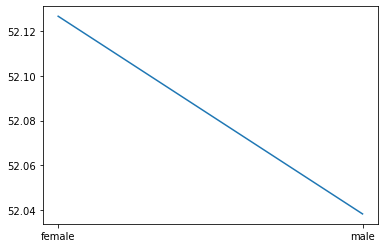

In [137]:
x = ['female','male']
y = [df_fem['age'].mean(),df_mal['age'].mean()]

plt.plot(x,y)

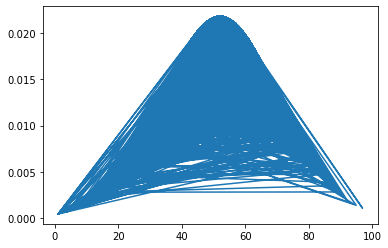

52.03835125448029 18.26386118713148


In [164]:
from scipy.stats import norm
import statistics as st

x_axis = list(df_mal['age'])

mean = st.mean(x_axis)
sd = st.stdev(x_axis)

plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()



print ( mean , sd)